## Step 1 : Load Packages and Libraries

In [50]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

import warnings
warnings.filterwarnings('ignore')

## Step 1 : Data Loading and Preprocessing

In [51]:
import os
import zipfile
import pandas as pd

# Set Kaggle configuration
os.environ["KAGGLE_CONFIG_DIR"] = os.path.expanduser("~/.kaggle")

# Dataset identifier
dataset = "promptcloud/walmart-product-review-dataset"

# Download dataset
if not os.path.exists("walmart-product-review-dataset.zip"):
    os.system(f"kaggle datasets download -d {dataset}")

# Extract dataset
zip_file = "walmart-product-review-dataset.zip"
extract_dir = "dataset"

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

# Verify extracted files
extracted_files = os.listdir(extract_dir)
print("Extracted files:", extracted_files)

# Update the file path to the actual CSV file name
file_path = os.path.join(extract_dir, "walmart-product-reviews.csv")  # Update if the file name differs

# Load and display the dataset
if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print(data.head())
else:
    print(f"File not found: {file_path}")

Extracted files: ['Walmart_dataset.tsv']
File not found: dataset/walmart-product-reviews.csv


In [52]:
df = pd.read_csv('dataset/Walmart_dataset.tsv', sep='\t')

In [53]:
df.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [54]:
df.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [55]:
df.columns = df.columns.str.replace(' ','_')

In [56]:
df.columns

Index(['Uniq_Id', 'Crawl_Timestamp', 'Dataset_Origin', 'Product_Id',
       'Product_Barcode', 'Product_Company_Type_Source',
       'Product_Brand_Source', 'Product_Brand_Normalised_Source',
       'Product_Name_Source', 'Match_Rank', 'Match_Score', 'Match_Type',
       'Retailer', 'Product_Category', 'Product_Brand', 'Product_Name',
       'Product_Price', 'Sku', 'Upc', 'Product_Url', 'Market',
       'Product_Description', 'Product_Currency',
       'Product_Available_Inventory', 'Product_Image_Url',
       'Product_Model_Number', 'Product_Tags', 'Product_Contents',
       'Product_Rating', 'Product_Reviews_Count', 'Bsr', 'Joining_Key'],
      dtype='object')

In [57]:
df.isnull().sum()

Uniq_Id                               0
Crawl_Timestamp                       0
Dataset_Origin                     5000
Product_Id                            0
Product_Barcode                    5000
Product_Company_Type_Source           0
Product_Brand_Source               4861
Product_Brand_Normalised_Source    4861
Product_Name_Source                4861
Match_Rank                         5000
Match_Score                        5000
Match_Type                         5000
Retailer                              0
Product_Category                     10
Product_Brand                        13
Product_Name                          0
Product_Price                        42
Sku                                5000
Upc                                5000
Product_Url                           0
Market                                0
Product_Description                1127
Product_Currency                      0
Product_Available_Inventory           0
Product_Image_Url                     0


In [58]:
df.shape

(5000, 32)

In [59]:
df.head()

,Uniq_Id,Crawl_Timestamp,Dataset_Origin,Product_Id,Product_Barcode,Product_Company_Type_Source,Product_Brand_Source,Product_Brand_Normalised_Source,Product_Name_Source,Match_Rank,...,Product_Currency,Product_Available_Inventory,Product_Image_Url,Product_Model_Number,Product_Tags,Product_Contents,Product_Rating,Product_Reviews_Count,Bsr,Joining_Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [60]:
df.isnull().sum()

Uniq_Id                               0
Crawl_Timestamp                       0
Dataset_Origin                     5000
Product_Id                            0
Product_Barcode                    5000
Product_Company_Type_Source           0
Product_Brand_Source               4861
Product_Brand_Normalised_Source    4861
Product_Name_Source                4861
Match_Rank                         5000
Match_Score                        5000
Match_Type                         5000
Retailer                              0
Product_Category                     10
Product_Brand                        13
Product_Name                          0
Product_Price                        42
Sku                                5000
Upc                                5000
Product_Url                           0
Market                                0
Product_Description                1127
Product_Currency                      0
Product_Available_Inventory           0
Product_Image_Url                     0


In [61]:
df.head()

,Uniq_Id,Crawl_Timestamp,Dataset_Origin,Product_Id,Product_Barcode,Product_Company_Type_Source,Product_Brand_Source,Product_Brand_Normalised_Source,Product_Name_Source,Match_Rank,...,Product_Currency,Product_Available_Inventory,Product_Image_Url,Product_Model_Number,Product_Tags,Product_Contents,Product_Rating,Product_Reviews_Count,Bsr,Joining_Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [62]:
df.shape

(5000, 32)

In [63]:
df.isnull().sum()

Uniq_Id                               0
Crawl_Timestamp                       0
Dataset_Origin                     5000
Product_Id                            0
Product_Barcode                    5000
Product_Company_Type_Source           0
Product_Brand_Source               4861
Product_Brand_Normalised_Source    4861
Product_Name_Source                4861
Match_Rank                         5000
Match_Score                        5000
Match_Type                         5000
Retailer                              0
Product_Category                     10
Product_Brand                        13
Product_Name                          0
Product_Price                        42
Sku                                5000
Upc                                5000
Product_Url                           0
Market                                0
Product_Description                1127
Product_Currency                      0
Product_Available_Inventory           0
Product_Image_Url                     0


### Considering only relevant data for working

In [64]:
df=df[['Uniq_Id','Product_Id','Product_Rating','Product_Reviews_Count','Product_Category','Product_Brand','Product_Name','Product_Image_Url','Product_Description','Product_Tags']]

In [65]:
df.head()

,Uniq_Id,Product_Id,Product_Rating,Product_Reviews_Count,Product_Category,Product_Brand,Product_Name,Product_Image_Url,Product_Description,Product_Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,NaN,NaN,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,NaN,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


In [66]:
df.columns

Index(['Uniq_Id', 'Product_Id', 'Product_Rating', 'Product_Reviews_Count',
       'Product_Category', 'Product_Brand', 'Product_Name',
       'Product_Image_Url', 'Product_Description', 'Product_Tags'],
      dtype='object')

In [67]:
df.isnull().sum()

Uniq_Id                     0
Product_Id                  0
Product_Rating           2806
Product_Reviews_Count    1654
Product_Category           10
Product_Brand              13
Product_Name                0
Product_Image_Url           0
Product_Description      1127
Product_Tags                0
dtype: int64

In [68]:
df['Product_Rating'].fillna(0,inplace=True)
df['Product_Reviews_Count'].fillna(0,inplace=True)
df['Product_Category'].fillna('',inplace=True)
df['Product_Brand'].fillna('',inplace=True)
df['Product_Description'].fillna('',inplace=True)

In [69]:
df.isnull().sum()

Uniq_Id                  0
Product_Id               0
Product_Rating           0
Product_Reviews_Count    0
Product_Category         0
Product_Brand            0
Product_Name             0
Product_Image_Url        0
Product_Description      0
Product_Tags             0
dtype: int64

In [70]:
df.columns

Index(['Uniq_Id', 'Product_Id', 'Product_Rating', 'Product_Reviews_Count',
       'Product_Category', 'Product_Brand', 'Product_Name',
       'Product_Image_Url', 'Product_Description', 'Product_Tags'],
      dtype='object')

In [71]:
## Extracting numeric values from strings and prepare them for numerical operations
df['Uniq_Id']=df['Uniq_Id'].str.extract(r'(\d+)').astype(float)
df['Product_Id']=df['Product_Id'].str.extract(r'(\d+)').astype(float)

In [72]:
df['Product_Id']

0         2.0
1        76.0
2         8.0
3         3.0
4         3.0
        ...  
4995    208.0
4996      1.0
4997     96.0
4998      7.0
4999      1.0
Name: Product_Id, Length: 5000, dtype: float64

In [73]:
df['Uniq_Id']

0       1.705737e+09
1       9.500000e+01
2       8.000000e+00
3       4.000000e+00
4       9.900000e+02
            ...     
4995    2.771000e+03
4996    0.000000e+00
4997    3.400000e+01
4998    9.000000e+00
4999    0.000000e+00
Name: Uniq_Id, Length: 5000, dtype: float64

In [74]:
df.head()

,Uniq_Id,Product_Id,Product_Rating,Product_Reviews_Count,Product_Category,Product_Brand,Product_Name,Product_Image_Url,Product_Description,Product_Tags
0,1.705737e+09,2.0,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


## Exploratory Data Analysis

In [75]:
num_users=df['Uniq_Id'].nunique()
print(f'Number of unique users: {num_users}')

print("-" * 60)

num_items=df['Product_Id'].nunique()
print(f'Number of unique products: {num_items}')

print("-" * 60)

num_ratings=df['Product_Rating'].nunique()
print(f'Number of unique Ratings: {num_ratings}')

Number of unique users: 1721
------------------------------------------------------------
Number of unique products: 1697
------------------------------------------------------------
Number of unique Ratings: 36


In [76]:
## Heat map on ratings and data

heat_map = df.pivot_table('Uniq_Id','Product_Rating')

In [77]:
heat_map

,Uniq_Id
Product_Rating,
0.0,2.903881e+20
1.0,4.810669e+05
1.3,8.000000e+00
1.5,3.315000e+02
1.8,3.517850e+04
2.0,1.834903e+06
2.1,7.099400e+05
2.2,4.666667e+00
2.3,5.533333e+02


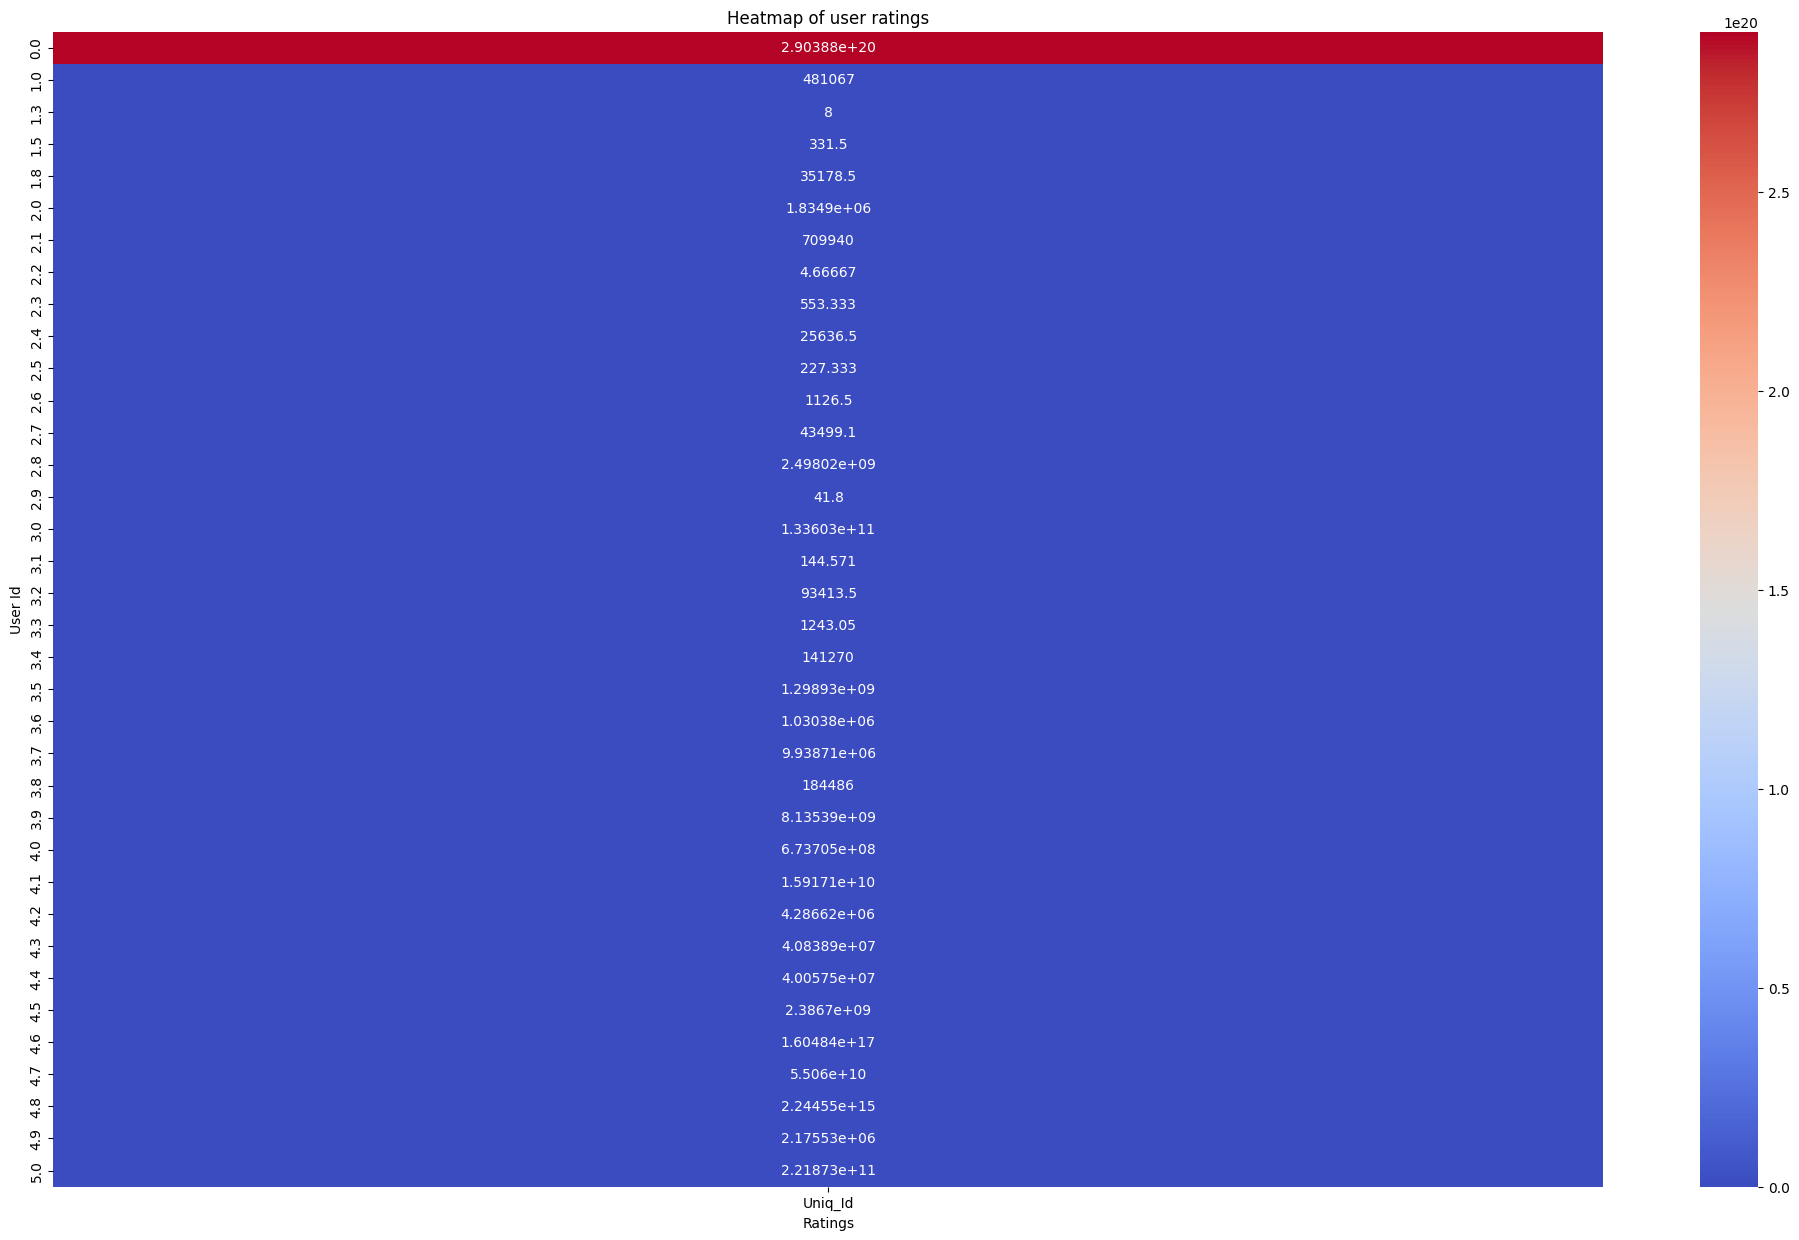

In [78]:
plt.figure(figsize=(25,15))
sns.heatmap(heat_map,annot=True,fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of user ratings')
plt.xlabel('Ratings')
plt.ylabel('User Id')
plt.show()

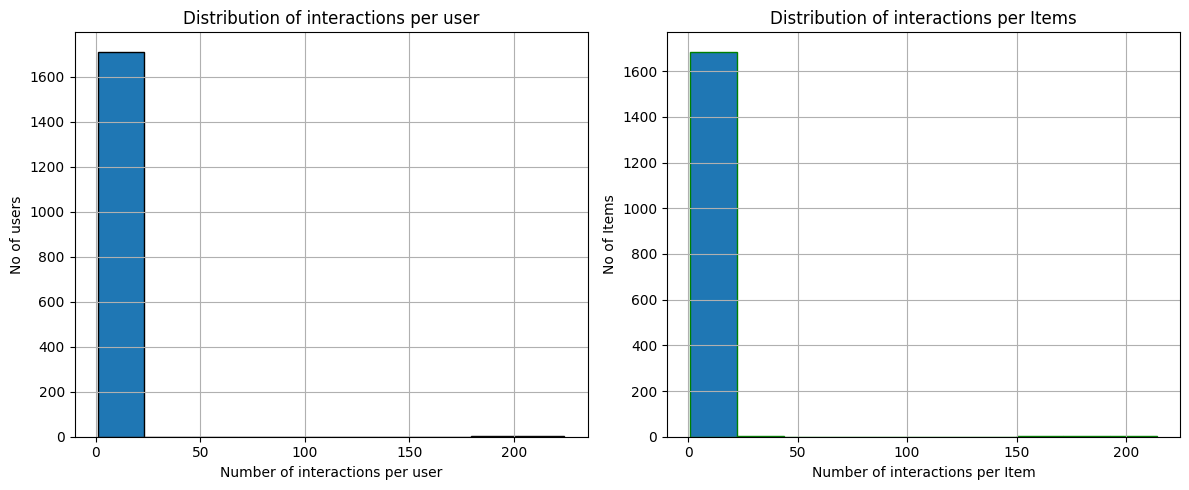

In [79]:
## Distribution of Interactions

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df['Uniq_Id'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Number of interactions per user')
plt.ylabel('No of users')
plt.title('Distribution of interactions per user')

plt.subplot(1,2,2)
df['Product_Id'].value_counts().hist(bins=10, edgecolor='g')
plt.xlabel('Number of interactions per Item')
plt.ylabel('No of Items')
plt.title('Distribution of interactions per Items')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Most Poular Items')

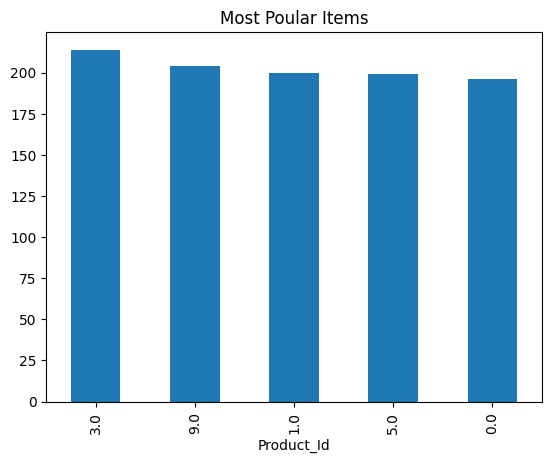

In [80]:
## Most popular Items
popular_items = df['Product_Id'].value_counts().head(5)
popular_items.plot(kind='bar')
plt.title("Most Poular Items")

Text(0.5, 1.0, 'Most Rated Items')

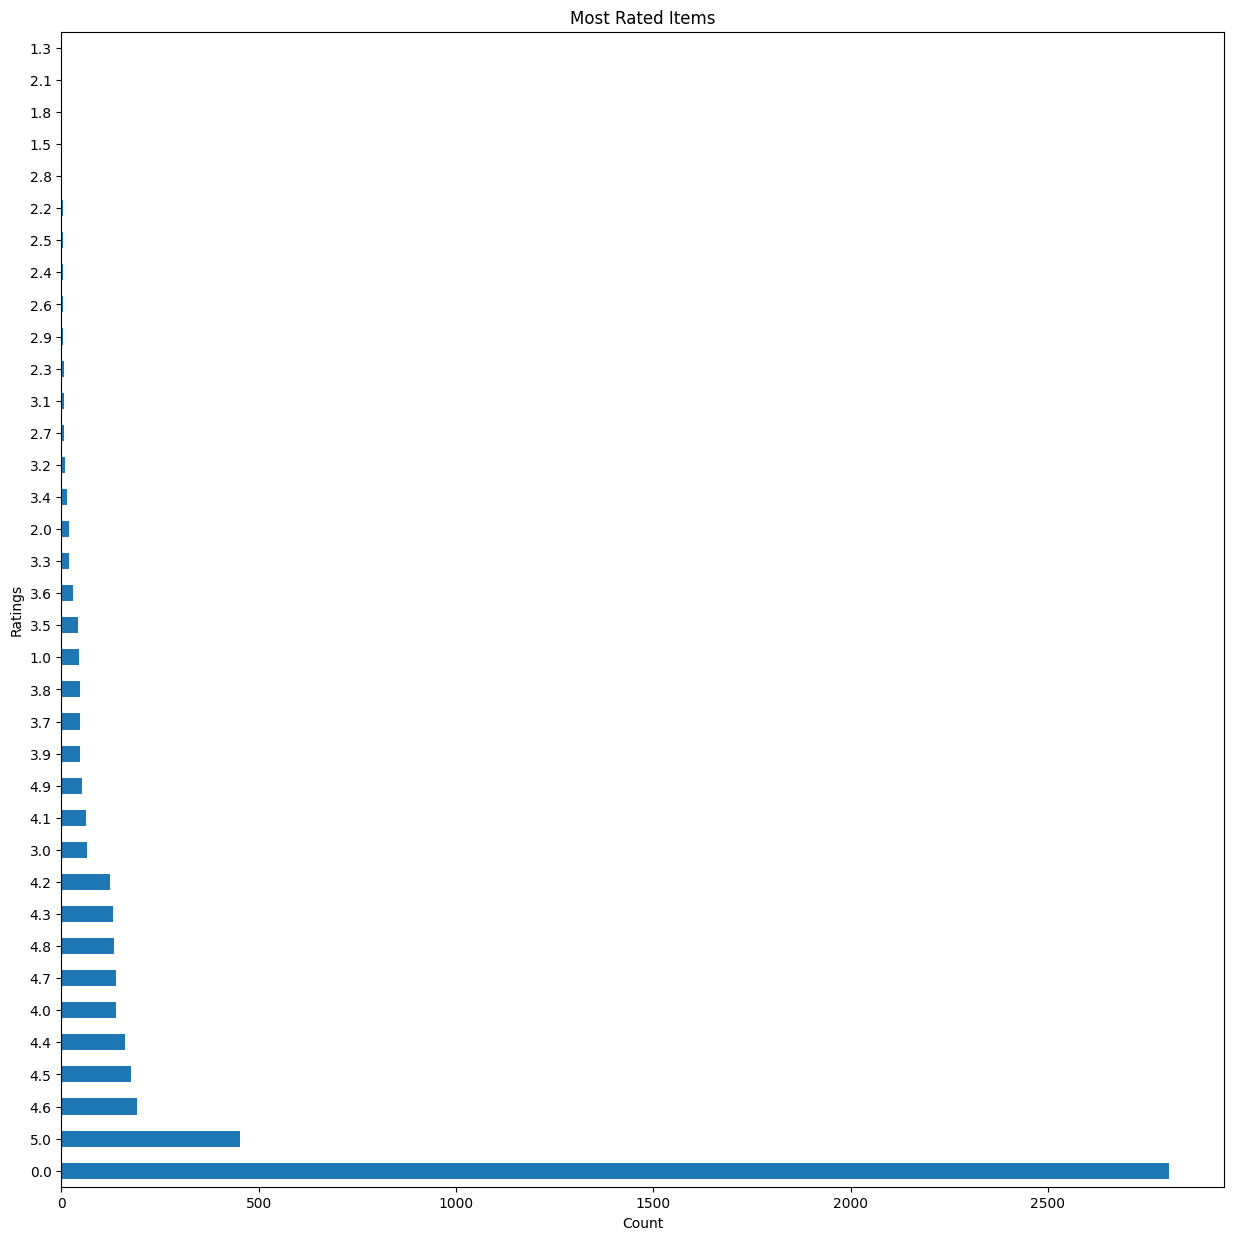

In [81]:
## Most Rated counts
plt.figure(figsize=(15,15))
df['Product_Rating'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("Ratings")
plt.title("Most Rated Items")

## Step 3 : Data Cleaning and Tags Creations

In [82]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Get the English stopwords set
stop_words = set(stopwords.words('english'))

def clean_and_extract_tags_nltk(text):
    # Tokenize the text and convert to lowercase
    tokens = word_tokenize(text.lower())
    # Filter tokens: keep alphanumeric and remove stopwords
    tags = [token for token in tokens if token.isalnum() and token not in stop_words]
    return ', '.join(tags)

# Columns from which to extract tags
columns_to_extract_tags_from = ['Product_Category', 'Product_Brand', 'Product_Description']

# Apply the function to the specified columns
for column in columns_to_extract_tags_from:
    df[column] = df[column].apply(clean_and_extract_tags_nltk)



[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rahulpoojith/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rahulpoojith/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [83]:
df

,Uniq_Id,Product_Id,Product_Rating,Product_Reviews_Count,Product_Category,Product_Brand,Product_Name,Product_Image_Url,Product_Description,Product_Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...",Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","Kokie Professional Matte Lipstick, Hot Berry, ..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","Gillette TRAC II Plus Razor Blade Refills, Fit..."
...,...,...,...,...,...,...,...,...,...,...
4995,2.771000e+03,208.0,4.5,2.0,"household, essentials, air, fresheners, spray,...","eclectic, lady","Garden Mint Room Spray (Double Strength), 4 ou...",https://i5.walmartimages.com/asr/0e0416ae-6b70...,"garden, mint, lovely, blend, spearmint, lettuc...","Garden Mint Room Spray (Double Strength), 4 ou..."
4996,0.000000e+00,1.0,3.9,7484.0,"beauty, hair, care, hair, color, permanent, ha...",garnier,Garnier Nutrisse Nourishing Hair Color Creme (...,https://i5.walmartimages.com/asr/24d7a837-51f8...,"garnier, nutrisse, nourishing, hair, color, cr...",Garnier Nutrisse Nourishing Hair Color Creme (...
4997,3.400000e+01,96.0,0.0,4.0,"beauty, makeup, nails",stoneway,"Nail File Electric Drill, 6 in 1 Professional ...",https://i5.walmartimages.com/asr/d6202179-2c93...,"multifunctional, nail, drill, kit, come, 6, di...","Nail File Electric Drill, 6 in 1 Professional ..."
4998,9.000000e+00,7.0,0.0,0.0,"premium, beauty, premium, bath, body, premium,...",creed,Creed Love In Black Hair And Body Wash 6.8oz/2...,https://i5.walmartimages.com/asr/3dc99239-66d2...,,Creed Love In Black Hair And Body Wash 6.8oz/2...


In [84]:
df['Tags']=df[columns_to_extract_tags_from].apply(lambda row: ', '.join(row),axis =1)

In [85]:
df['Tags']

0       premium, beauty, premium, makeup, premium, nai...
1       beauty, hair, care, hair, color, auburn, hair,...
2       beauty, hair, care, hair, color, permanent, ha...
3       beauty, makeup, lip, kokie, cosmetics, calling...
4       seasonal, stock, essentials, personal, care, s...
                              ...                        
4995    household, essentials, air, fresheners, spray,...
4996    beauty, hair, care, hair, color, permanent, ha...
4997    beauty, makeup, nails, stoneway, multifunction...
4998    premium, beauty, premium, bath, body, premium,...
4999    beauty, makeup, face, makeup, face, makeup, br...
Name: Tags, Length: 5000, dtype: object

In [86]:
df.columns

Index(['Uniq_Id', 'Product_Id', 'Product_Rating', 'Product_Reviews_Count',
       'Product_Category', 'Product_Brand', 'Product_Name',
       'Product_Image_Url', 'Product_Description', 'Product_Tags', 'Tags'],
      dtype='object')

## Rating Based Recommendation System

In [87]:
average_ratings = df.groupby(['Product_Name','Product_Reviews_Count','Product_Brand','Product_Image_Url'])['Product_Rating'].mean().reset_index()

In [88]:
top_rated_items=average_ratings.sort_values(by='Product_Rating',ascending=False)

rating_based_recommendations=top_rated_items.head(100)

In [89]:
rating_based_recommendations['Product_Rating']=rating_based_recommendations['Product_Rating'].astype(int)
rating_based_recommendations['Product_Reviews_Count']=rating_based_recommendations['Product_Reviews_Count'].astype(int)

In [90]:
rating_based_recommendations

,Product_Name,Product_Reviews_Count,Product_Brand,Product_Image_Url,Product_Rating
1686,"Electric Shaver, Triple Shaving Time Electric ...",4,moosoo,https://i5.walmartimages.com/asr/e7dcd553-90df...,5
526,"Alaffia Body Lotion, Vanilla, 32 Oz",2,alaffia,https://i5.walmartimages.com/asr/2988c323-cb6f...,5
2053,"Gold Bond Ultimate Ultimate Healing Lotion, Al...",2,"gold, bond",https://i5.walmartimages.com/asr/34b610e7-05db...,5
4716,"Versace Man Eau Fraiche Eau De Toilette Spray,...",24,versace,https://i5.walmartimages.com/asr/edaaeed5-9da0...,5
2058,Goldwell StyleSign 1 Flat Marvel Straightening...,2,goldwell,https://i5.walmartimages.com/asr/3bf90289-6980...,5
...,...,...,...,...,...
4836,"YU-BE Moisturizing Skin Cream, 2.2 oz.",1,,https://i5.walmartimages.com/asr/18bcb6a1-7547...,5
2910,Medline Protection Plus Overnight Disposable U...,1,medline,https://i5.walmartimages.com/asr/e7317167-38ef...,5
2908,Medline FitRight Restore Ultra Disposable Brie...,1,medline,https://i5.walmartimages.com/asr/7a1879fc-99ae...,5
4833,YLSHRF 54W UV Nail Dryer Lamp Quick Drying Nai...,1,ylshrf,https://i5.walmartimages.com/asr/dde634ea-27db...,5
